In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
car_df = pd.read_csv("car-sales-extended.csv")

In [3]:
!cd

E:\data science projects\training_and_learning_machine_learning\training-and-learning-machine-learning-and-data-science


In [4]:
car_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [5]:
car_df.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [6]:
car_df.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [8]:
x = car_df.drop('Price', axis=1)
y = car_df['Price']

In [9]:
car_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)],remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [11]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [12]:
car_df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [13]:
# another way to transform data
# dummies = pd.get_dummies(car_df[['Make', 'Colour', 'Doors']])
# dummies

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
x_train, x_test

model.fit(x_train, y_train)

NameError: name 'model' is not defined

In [ ]:
model.score(x_test, y_test)

In [ ]:
# dealing with missing values
car_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_missing.head()

In [ ]:
car_missing.info()

In [ ]:
car_missing.isna().sum()

In [ ]:
car_missing.head()

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# x = car_missing.drop('Price', axis=1)
# y = car_missing['Price']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer 

# categorical_features = ['Make', 'Colour', 'Doors']
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer(['one_hot', one_hot, categorical_features], remainder='passthrough')


# transformed_x = transformer.fit_transform(x)

In [ ]:
# we have to first fill the missing values

#fill the Make column
car_missing.fillna({'Make':'missing'}, inplace=True)

# fill the Colour column
car_missing.fillna({'Colour': 'missing'}, inplace=True)

# fill the Odometer (KM) coloumn
car_missing.fillna({'Odometer (KM)':'missing'}, inplace=True)

# fill the Doors column
car_missing.fillna({'Doors':'missing'}, inplace=True)

In [ ]:
car_missing.isna().sum()

In [ ]:
# delete all the missing values for Price columns
car_missing.dropna(inplace=True)

car_missing.isna().sum()

In [ ]:
len(car_missing)

In [ ]:
# and now again we tranform the categorical  columns to numeric
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot, categorical_features)], remainder = 'passthrough')

transformed_x = transformer.fit_transform(x)

In [ ]:
# now we will use another way to fill missing values

car_df = pd.read_csv('car-sales-extended-missing-data.csv')
car_df.head()

In [ ]:
car_df.isna().sum()

In [ ]:
# deleting the missing value rows in price column
car_df.dropna(subset=['Price'], inplace=True)

In [ ]:
car_df.isna().sum()

In [ ]:
# split into x and y 
x = car_df.drop('Price', axis=1)
y = car_df['Price']

x, y

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# filling categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

In [ ]:
car_df.head()

In [ ]:
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']
# create the imputer sth that filles the missing values
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

In [ ]:
# we are going to transform the data
filled_x = imputer.fit_transform(x)
filled_x

In [ ]:
# now we create another dataframe 
car_sales_filled = pd.DataFrame(filled_x, columns=['Make', 'Colour', 'Odometer (KM)', 'Doors'])
car_sales_filled

In [ ]:
car_sales_filled.isna().sum()

In [ ]:
# now let's transform categorical columns into numbers 
# first we should make x and y but we have already done that 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

In [ ]:
# now we have got our data as numbers and filled now let's fit it 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y)
model = RandomForestRegressor(random_state=7)
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
# now we will use california housing dataset 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

In [ ]:
housing_df = pd.DataFrame(housing['data'])
housing_df.head()

In [ ]:
print(housing.feature_names)

In [ ]:
housing_features = housing.feature_names
housing_df = pd.DataFrame(data=housing.data, columns=housing_features)
housing_df

In [ ]:
housing_df.columns

In [ ]:
# this is the target column
housing.target_names, housing['target']

In [ ]:
print(type(housing['target']))

In [ ]:
# housing['target'] = housing['target'].apply(lambda x: int(x * 100000))
# housing['MedHouseVal'] = housing['target'].astype(int)
# housing_df['MedHouseVal'] = (housing['target'] * 100000)
# housing_df['MedHouseVal'] = housing_df['MedHouseVal'].apply(lambda x: int(x))

housing_df['MedHouseVal'] = housing['target'] * 100000
housing_df['MedHouseVal'] = housing_df['MedHouseVal'].astype(int) 


housing_df.head()

In [ ]:
print(housing[''].dtype)

In [ ]:
# change the MedHouseVal column name to target 
housing_df['target'] = housing_df['MedHouseVal']
housing_df = housing_df.drop(columns='MedHouseVal', axis=1)
housing_df

In [ ]:
x = housing_df.drop('target', axis= 1)
y = housing_df['target']

x, y 

In [ ]:
housing_df.isna().sum()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train.shape, x_test.shape

In [ ]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(x_train, y_train)

In [ ]:
y_preds = model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 

mse = mean_squared_error(y_test, y_preds)
r2 = r2_score(y_test, y_preds)

In [ ]:
print(f'mean squared error: {mse}')
print(f'r2 score : {r2}')

In [ ]:
model.score(x_test, y_test)

In [ ]:
# now let's try another model to improve our performance
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

In [ ]:
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)

In [ ]:
r2 = clf.score(x_test, y_test)
print(f'r2 score is {r2}')

In [3]:
# picking a machine learning model for classification problem
# we will use the heart disease dataset 

df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [16]:
columns = df.columns
columns[0], type(columns)

('age', pandas.core.indexes.base.Index)

In [17]:
for i in columns: 
    print(df[i].value_counts())

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
sex
1    207
0     96
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1

In [18]:
len(df)

303

In [19]:
# befor we fit the data we should make sure that all the columns are numerical and there are no missing values
# there are no missing values
# df.isna().sum()
# all the columns are numerical
# df.dtypes



In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# now let's make x and y 
x = df.drop('target', axis=1)
y = df['target']

x, y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [22]:
# # we need an estimator now and we use scikit-learn map and we get to LinearSVC
# from sklearn.svm import LinearSVC
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# # np.random.seed(7)
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

# # now let's scale features , because svm is sensitive to the scale of the features
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# model = LinearSVC()
# model.fit(x_train_scaled, y_train)

# # make predictions 
# y_preds = model.predict(x_test_scaled)

# # evaluate the model 
# score = model.score(y_test, y_preds)
# print(f'accuracy score : {score}')

ValueError: Found input variables with inconsistent numbers of samples: [800, 242]

In [23]:
# now we are going to use RandomForestClassifier
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df.drop('target', axis=1)
y = df['target']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
clf.score(x_test, y_test)


0.7868852459016393

In [35]:
# using predic proba
clf.predict_proba(x_test[:5])

array([[0.21, 0.79],
       [0.12, 0.88],
       [0.  , 1.  ],
       [0.61, 0.39],
       [0.89, 0.11]])

In [36]:
clf.predict(x_test[:5])

array([1, 1, 1, 0, 0], dtype=int64)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# evaluating a machine learning model through cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(random_state=42)

clf.fit(x_train, y_train)
clf.score(x_test, y_test)

NameError: name 'df' is not defined

In [6]:
cross_val_score(clf, x, y, cv=10)

array([0.80645161, 0.83870968, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.76666667, 0.86666667])

In [7]:
# what we can do is to take the average value of cross validation
np.random.seed(42)

clf_single_score = clf.score(x_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

# compare the two scores
clf_single_score, clf_cross_val_score

(0.8032786885245902, 0.8381967213114756)

In [8]:
# classification model evaluation metrics 
# accuracy 
# area under curve 
# confusion matrix
# classification report 

In [18]:
# first we will check accuracy 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
acc_score = accuracy_score(y_test, y_preds)
# we know that the score default function in sklearn for classification is accuracy
score_cross_val = cross_val_score(clf, x, y, cv=5)
clf.score(x_test, y_test), acc_score, score_cross_val, np.mean(score_cross_val)


(0.8032786885245902,
 0.8032786885245902,
 array([0.81967213, 0.8852459 , 0.83606557, 0.85      , 0.8       ]),
 0.8381967213114756)

In [19]:
#classification metric ROC Curve and area under curve
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier

x = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

y_probs = clf.predict_proba(x_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.11, 0.04, 0.03, 0.96, 0.97, 0.9 , 0.27, 0.05, 0.99, 0.8 ])

In [20]:
# calculate fpr, tpr, tresholds
fpr, tpr, tresholds = roc_curve(y_test, y_probs_positive)

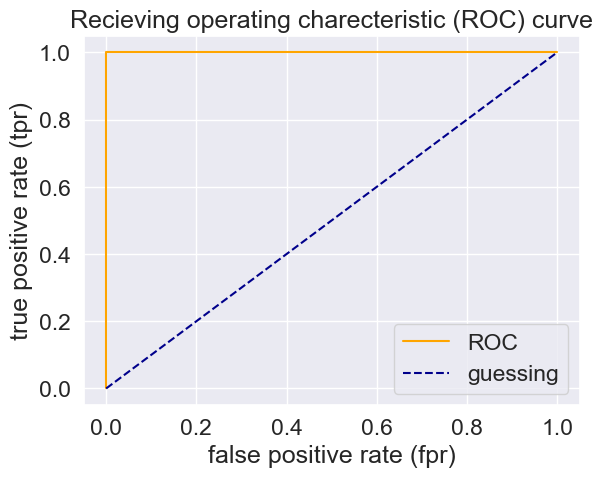

In [21]:
# we want to plot the roc curve visually
def plot_roc_curve(fpr, tpr):
    """
        plots a ROC curve given the false positives (fpr)
        and true positive rate of a model(tpr) of a model
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color = 'orange', label='ROC')
    # plot line with no predictive power(baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='guessing')
    # customize the plot
    plt.xlabel('false positive rate (fpr)')
    plt.ylabel('true positive rate (tpr)')
    plt.title('Recieving operating charecteristic (ROC) curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

1.0

In [23]:
# confusion matrix = it is a quick way to compare the labels a model predict with the actual labels it was supposed to predict
from sklearn.metrics import confusion_matrix
y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[24,  0],
       [ 2, 35]], dtype=int64)

In [24]:
# to understand it better let's visualize it 
pd.crosstab(y_test, y_preds, rownames=['Actual labels'], colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,0
1,2,35


In [25]:
len(y_preds), len(y_test)

(61, 61)

<Axes: >

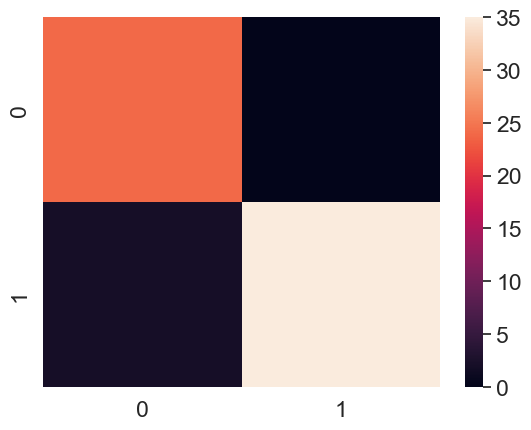

In [26]:
# making our confusion matrix more visual with seaborn heatmap
import seaborn as sns

# set the font scale 
sns.set(font_scale=1.5)

# create a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_preds)

# plot it using seaborn 
sns.heatmap(conf_matrix)

In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('heart-disease.csv')
x = df.drop('target', axis=1)
y = df['target']
x.head(), y.head()

(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  
 0   0     1  
 1   0     2  
 2   0     2  
 3   0     2  
 4   0     2  ,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: target, dtype: int64)

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x, y)

ConfusionMatrixDisplay.from_estimator(estimator=clf, x=x, y=y)

TypeError: ConfusionMatrixDisplay.from_estimator() got an unexpected keyword argument 'x'

In [36]:
# evaluating a classification model classification report


In [2]:
# evaluating a regression model 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_features = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_target = pd.DataFrame(data=housing.target, columns=housing.target_names)
# housing_df = pd.concat([housing_features, housing_target], axis=1)
housing_df = pd.concat([housing_features, housing_target], axis=1)
housing_df.head()
# housing_target
# housing

# housing_features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
x = housing_df.drop('MedHouseVal', axis=1)
y= housing_df['MedHouseVal']
x, y

(       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude  
 0    

In [8]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y)
clf = RandomForestRegressor()
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
clf.score(x_test, y_test)

0.7998053931518283

In [9]:
# mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

y_preds = clf.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.33355218658914737

In [11]:
# mean squared error 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

0.26559097422220584

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 

df = pd.read_csv('heart-disease.csv')
x= df.drop('target', axis=1)
y= df['target']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(random_state=42)
# clf.fit(x_train, y_train)

# we will use cross validation accuracy 
# cs_acc = cross_val_score(clf, x, y, cv=5, scoring=None)
cs_acc = cross_val_score(clf, x, y, scoring='accuracy')
# cs_acc
# cross validated accuracy 
print(f'cross validated accuracy is equal {np.mean(cs_acc)*100:.2f}%')

cross validated accuracy is equal 83.82%


In [3]:
# precision 
cv_precision = cross_val_score(clf, x, y, scoring='precision')
# cv_precision
print(f'the cross validated precision is : {cv_precision.mean()*100:.2f}%')

the cross validated precision is : 84.74%


In [6]:
# recall 
cv_recall = cross_val_score(clf, x, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.84848485, 0.87878788])

In [7]:
# cross validated recall
print(f'cross validated recall is equal to {cv_recall.mean()*100:.2f}')

cross validated recall is equal to 86.06


In [11]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [21]:
# scoring parameter for regression problems 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
housing_target_df = pd.DataFrame(data=housing.target, columns=['MedHouseVal'])
housing_df=pd.concat([housing_df, housing_target_df])

housing_df.head()

# x = housing_df.drop(columns=['MedHouseVal'],axis=1)
# y = housing_df['MedHouseVal']
# y

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,NaN
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,NaN
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,NaN
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,NaN
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,NaN


In [22]:
# how to get a model's hyper parameters 
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [29]:
# tuning hyper parameters by hand 
# hyper parameter tuning introduces a third set, a validation set 
# hyperparameters get tunded on the validation set 
# and finally a model gets evaluated on the test set
# we will use 70% for training , 15% for validation and 15% for testing 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluating_preds(y_true, y_preds):
    """
        performs evaluation comparison on y_true labels vs y_pred labels on a classification 
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = accuracy_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)

    metric_dict = {
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall':round(recall,2),
        'f1':round(f1, 2)
    }

    print(f'acc: {accuracy*100:.2f}%')
    print(f'precision: {precision*100:.2f}%')
    print(f'recall: {recall*100:.2f}%')
    print(f'f1: {f1*100:.2f}%')

    return metric_dict

In [39]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

df_shuffled = df.sample(frac=1)

x = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

# split the data into train, validation and test split 
train_split = round(0.7 * len(df_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(df_shuffled) )
x_train, y_train = x[:train_split], y[:train_split]
x_val, y_val = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

# len(x_train), len(x_val), len(x_test), len(x)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_preds = clf.predict(x_val)

baseline_metrics = evaluating_preds(y_val, y_preds)


acc: 82.22%
precision: 82.22%
recall: 88.00%
f1: 84.62%


In [41]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [45]:
# creating a second classifier with different hyper parameters 
np.random.seed(42)
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(x_train, y_train)
y_preds = clf_2.predict(x_val)
print(evaluating_preds(y_val, y_preds))

acc: 82.22%
precision: 82.22%
recall: 84.00%
f1: 84.00%
{'accuracy': 0.82, 'precision': 0.82, 'recall': 0.84, 'f1': 0.84}


In [51]:
# tuning hyper parameters using randomized search cross validation 
from sklearn.model_selection import RandomizedSearchCV, train_test_split

grid = {
    'n_estimators':[10, 100, 200, 500, 1000, 1200],
    'max_depth': [None, 5, 10, 20, 30],
    'max_features':['auto', 'sqrt'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
}

np.random.seed(42)
# split into x and y
x = df_shuffled.drop('target', axis=1)
y = df_shuffled['target']

# split into train and test 
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# instantiate random forest classifier
clf = RandomForestClassifier(n_jobs=1)
# setup randomizes search cv
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\miniconda\envs\new_env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\miniconda\envs\new_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\miniconda\envs\new_env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\miniconda\envs\new_env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\miniconda\envs\new_env\Lib\site-pack

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [52]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [53]:
# make predictions with the best hyper parameters
rs_y_preds = rs_clf.predict(x_test)
# evaluate the pridictions 
rs_metrcis = evaluating_preds(y_test, rs_y_preds)

acc: 81.97%
precision: 81.97%
recall: 85.71%
f1: 81.36%


In [57]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [56]:
# tuning our hyper parameters using gridseachcv
#this type of hper parameter tuning is going to take a lot of time and I can't test it with my weak laptop 
# so we will make our grid smalled

In [60]:
grid_2 = {
    'n_estimators': [100, 200, 500],
     'min_samples_split': [6],
     'min_samples_leaf': [2,1],
     'max_features': ['sqrt', 'sqrt'],
     'max_depth': [None]
}

In [62]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
# split into train and test 
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# make the model 
clf = RandomForestClassifier(n_jobs=1)
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)
gs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'sqrt'],
                         'min_samples_leaf': [2, 1], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [63]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [69]:
# # let's evaluate our modle 
gs_y_preds = gs_clf.predict(x_test)
gs_metrics = evaluating_preds(y_test, gs_y_preds)


acc: 80.33%
precision: 80.33%
recall: 85.71%
f1: 80.00%
